### Исходные данные

**Анализируемая выборка представляет собой статистические данные по нефинансовым предприятиям. Источником информации является бухгалтерская отчетность субъектов хозяйствования, представленная на отчетную дату (бухгалтерский баланс, отчет о прибылях и убытках).**

**Анализируемые коэффициенты характеризуют:**
- **ликвидность (k1-k3)**
- **финансовую устойчивость (k4-k10)**
- **динамику развития (k11, k12)**
- **деловую активность (k13-k17)**
- **рентабельность (k18-k20)**

# Предварительный анализ данных

### Цели и задачи

__Предварительный статистический анализ данных позволяет повести первичное исследование свойств рассматриваемой выборки данных. На данном этапе проводится графический анализ данных, рассматриваются основные описательные статистики, исследуется закон распределения, анализируется присутствие аномальных наблюдений,корреляционные связи и т.д. На основании полученных результатов делается заключение о возможности и целесообразности применения в дальнейшем к рассматриваемым данным различных статистических методов и алгоритмов анализа.__

In [1]:
import os
import sys
import pandas as pd
import pyreadstat
from math import log2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../src')

from visualization import histogram, box_plot
from preprocessing import process_koeff

## Загрузка данных

__Загрузка исходного набора данных, удаление вспомогательных переменных и формирование выборки экономических коэффициентов для анализа.__

In [2]:
file_path = '../data/Annual 2005-2011_START.sav'
df, _ = pyreadstat.read_sav(file_path)

df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cреднеспис.числ.работн  2695 non-null   float64
 1   k1                      2695 non-null   float64
 2   k2                      2695 non-null   float64
 3   k3                      2695 non-null   float64
 4   k4                      2695 non-null   float64
 5   k4_new                  1540 non-null   float64
 6   k5                      2695 non-null   float64
 7   k6                      2695 non-null   float64
 8   k7                      2695 non-null   float64
 9   k8                      2695 non-null   float64
 10  k9                      2695 non-null   float64
 11  k10                     2695 non-null   float64
 12  k11                     2695 non-null   float64
 13  k12                     2695 non-null   float64
 14  k13                     2695 non-null   

(2695, 23)

### Общая характеристика данных

- все показатели представлены числовыми значениями
- пропущенные значения отсутствуют
- выборка однородна по типу данных

In [3]:
coefficients_df = df.drop(['Cреднеспис.числ.работн', 'k4_new', 'Year'], axis=1)
coefficients_df.index = coefficients_df.index + 1
display(coefficients_df)

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19,k20
1,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,0.209235,1.115922,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904
2,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,0.215083,1.259382,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647
3,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,0.096737,0.774586,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000
4,7.859079,0.831978,2.449864,0.875862,0.059439,0.030030,0.011111,0.942010,16.244444,0.876663,1.223284,1.309449,2.804607,48.363889,26.142643,0.540541,33.676983,0.171731,0.496295,0.312415
5,1.779376,0.005596,0.883293,0.527853,0.135491,0.886686,0.489796,0.887341,10.558673,0.313389,0.874381,0.994832,0.473041,5.628827,3.125354,0.555241,19.103896,0.064809,0.025726,0.011839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,2.292818,0.157246,1.344241,0.488230,0.242939,0.287504,0.037536,0.757061,4.140520,0.903685,1.466706,1.515589,1.548526,8.469201,6.301110,0.744003,21.593865,0.144724,0.225957,0.190609
2692,1.572188,0.163862,1.032772,0.283944,0.169852,0.193680,0.000000,0.830148,6.752174,0.310967,1.595563,2.291405,1.451423,11.805435,11.071356,0.937819,20.000000,0.056625,0.084859,0.074050
2693,1.453574,0.023380,0.692051,0.312040,0.191408,0.361702,0.368349,0.808592,4.313779,0.385474,1.408224,2.111519,3.087073,16.469304,19.757774,1.199673,81.020134,0.068547,0.199335,0.108159
2694,1.310646,0.014829,0.330798,0.044386,0.251739,0.151533,0.027721,0.748261,4.449443,0.357647,1.671102,3.010763,1.598242,9.503749,25.150932,2.646422,35.840617,0.042199,0.067100,0.052599


## Описательные статистики для всех коэффициентов

__Исследование основных описательных статистик для каждого коэффициента (минимум, максимум, среднее, медиана, стандартное отклонение) с целью ознакомления с особенностями данных и их распределением.__

In [4]:
coefficients_df.describe().T

,count,mean,std,min,25%,50%,75%,max
k1,2695.0,2.002089,1.690052,0.248322,1.097990,1.473859,2.238232,18.020148
k2,2695.0,0.238018,0.517697,0.000000,0.017088,0.055551,0.211538,7.029135
k3,2695.0,0.825098,0.918292,0.008329,0.317674,0.538349,0.941372,11.187699
k4,2695.0,0.038115,0.625155,-4.569874,-0.181377,0.148620,0.422199,0.935935
k5,2695.0,0.346330,0.198008,0.009944,0.185165,0.319908,0.479741,1.083702
k6,2695.0,0.238031,0.213094,0.000000,0.062932,0.185185,0.361182,1.000000
k7,2695.0,0.174212,0.223266,0.000000,0.001073,0.075676,0.268773,1.000000
k8,2695.0,0.655964,0.195774,0.053766,0.522272,0.681890,0.817227,0.990056
k9,2695.0,6.862756,7.943256,0.059320,2.590124,4.758963,8.245208,199.605839
k10,2695.0,0.831359,0.802107,0.040014,0.356280,0.617689,0.987389,11.834268


## Графический анализ данных

__Для визуального анализа формы распределений используются гистограммы.
Количество интервалов определяется по правилу Стёрджеса.__

In [5]:
n = coefficients_df.shape[0]
n_bins = int(1 + log2(n))
print(f"Количество бинов для гистограмм: {n_bins}")

Количество бинов для гистограмм: 12


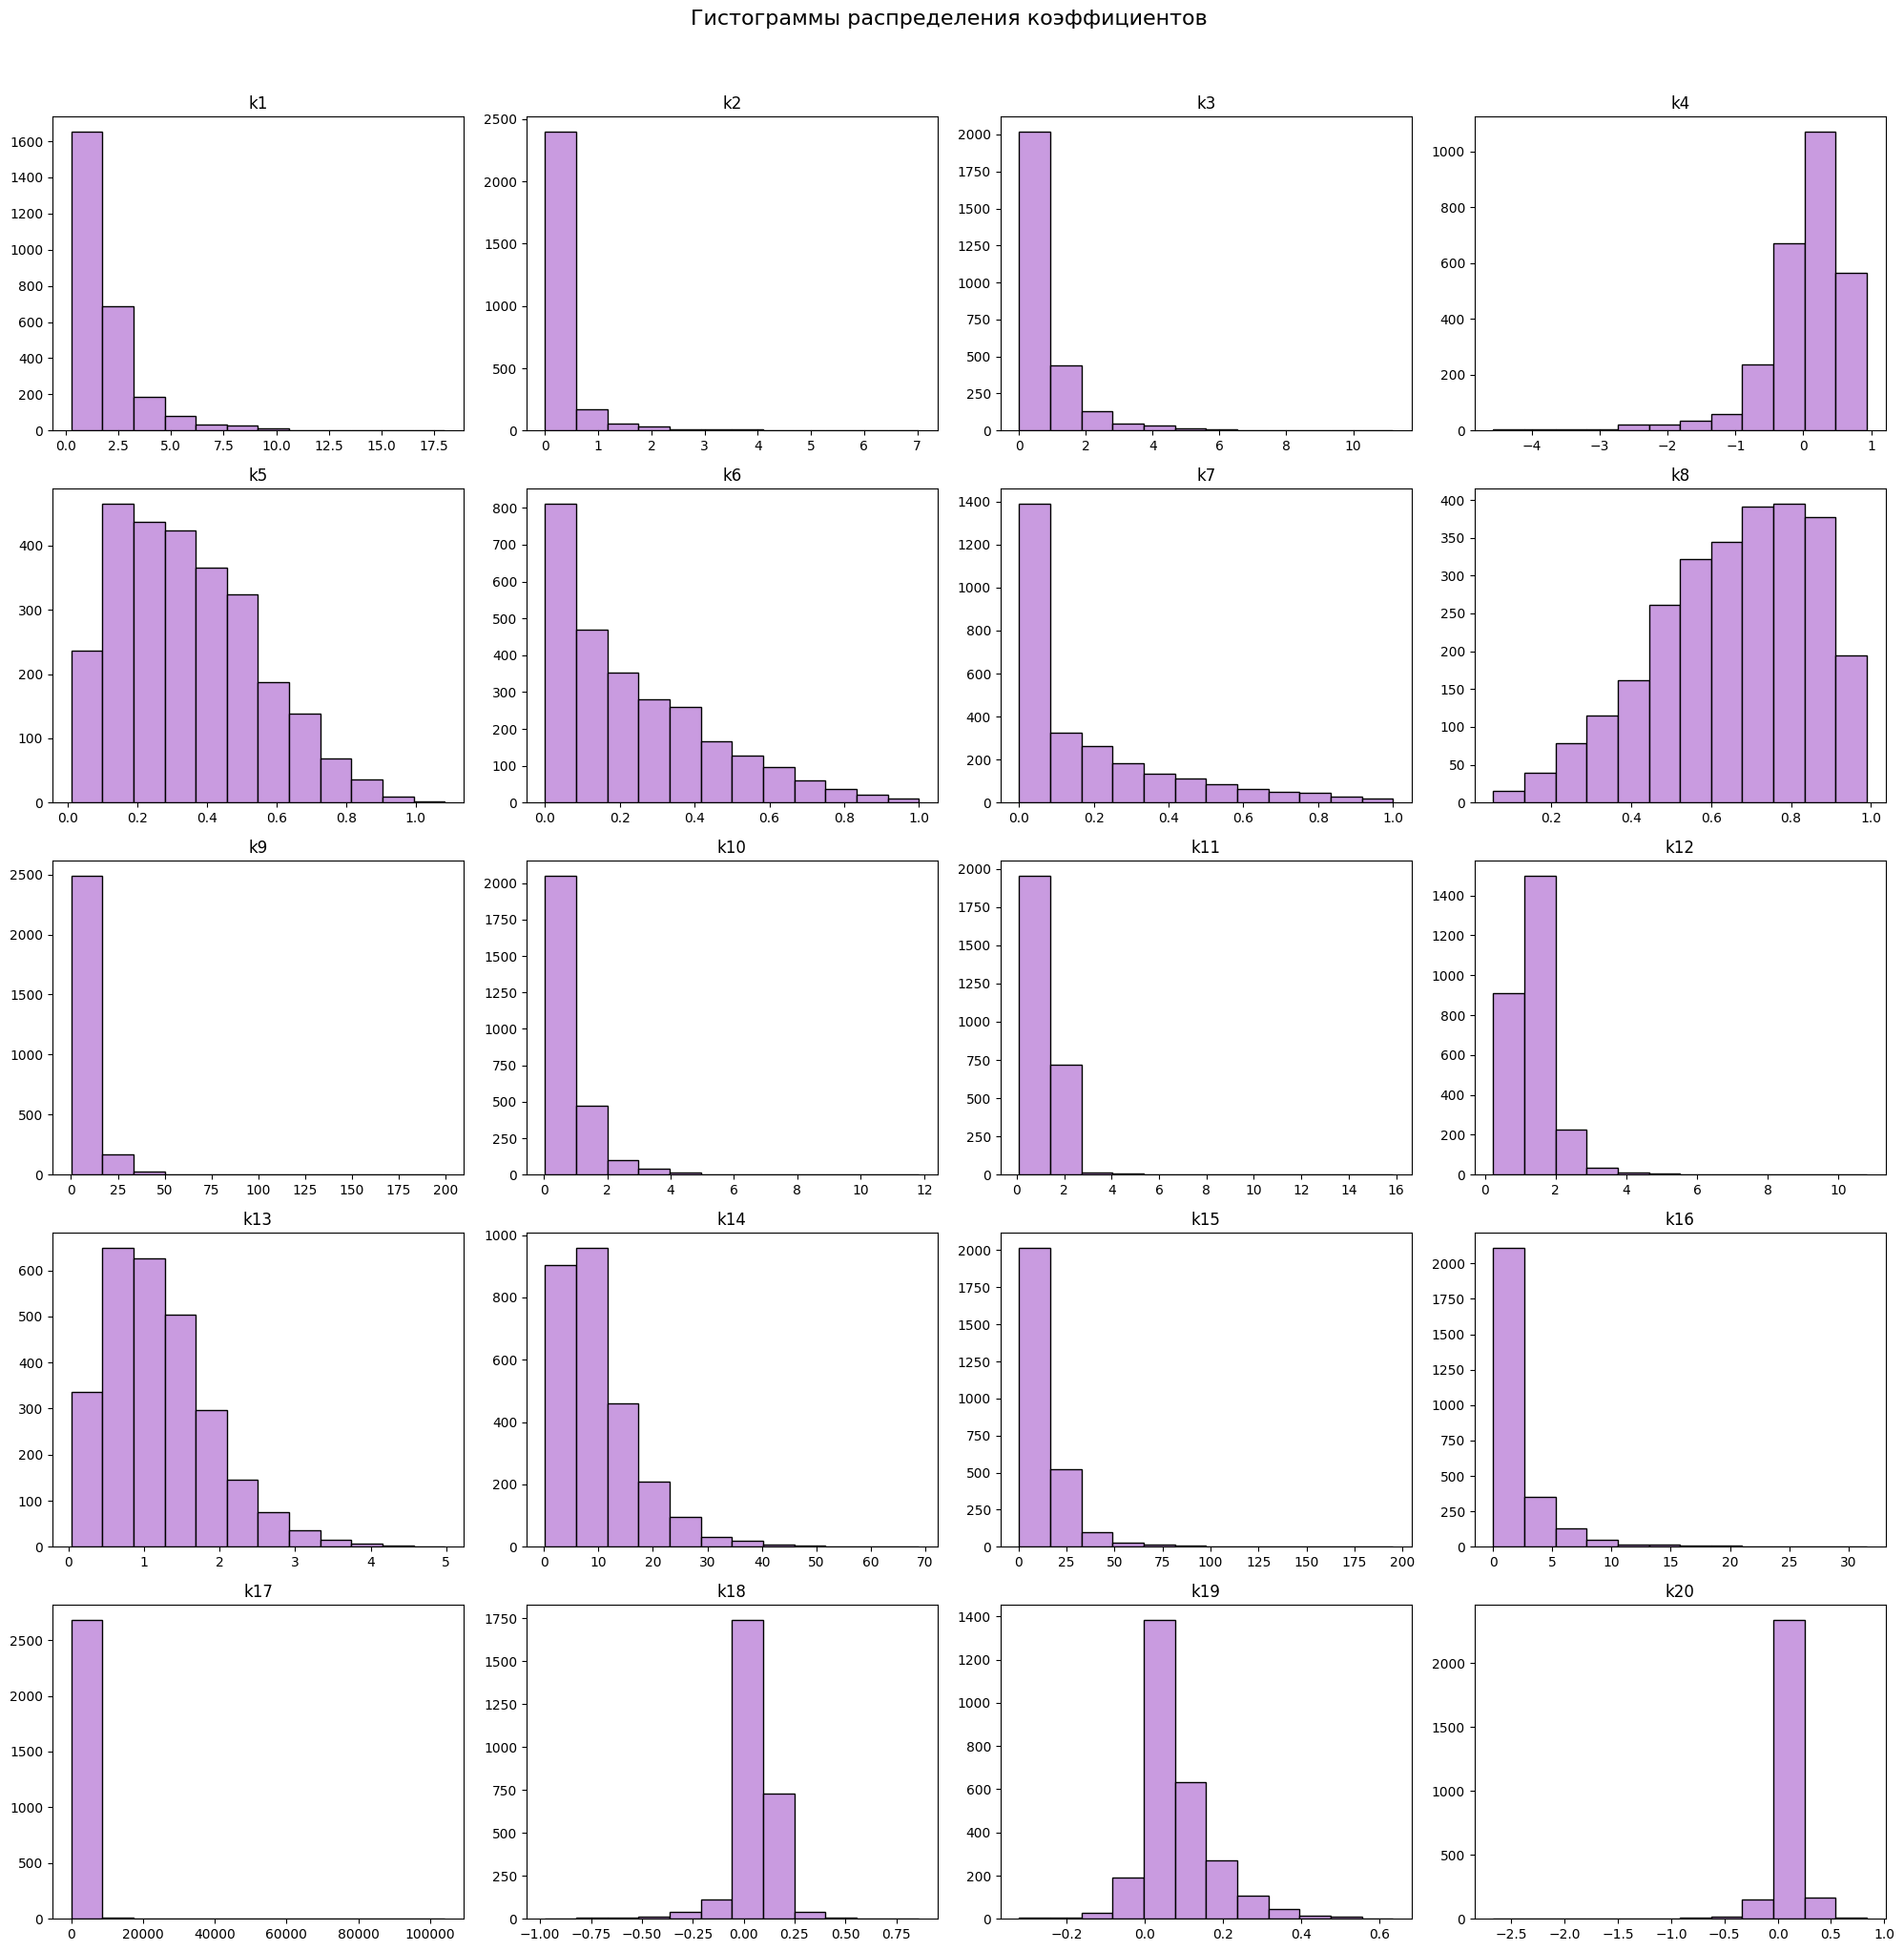

In [6]:
histogram(coefficients_df, n_bins)

## Анализ аномальных наблюдений

__С целью выявления аномальных наблюдений может проводиться визуальный анализ данных. Для этого используются ящичные диаграммы – графики, компактно изображающие одномерные распределения вероятностей.__

__Для выявления выбросов используется также метод Хампеля, устойчивый к асимметрии распределений. Значения коэффициентов дополнительно цензурируются на основе экспертно заданных допустимых интервалов.__

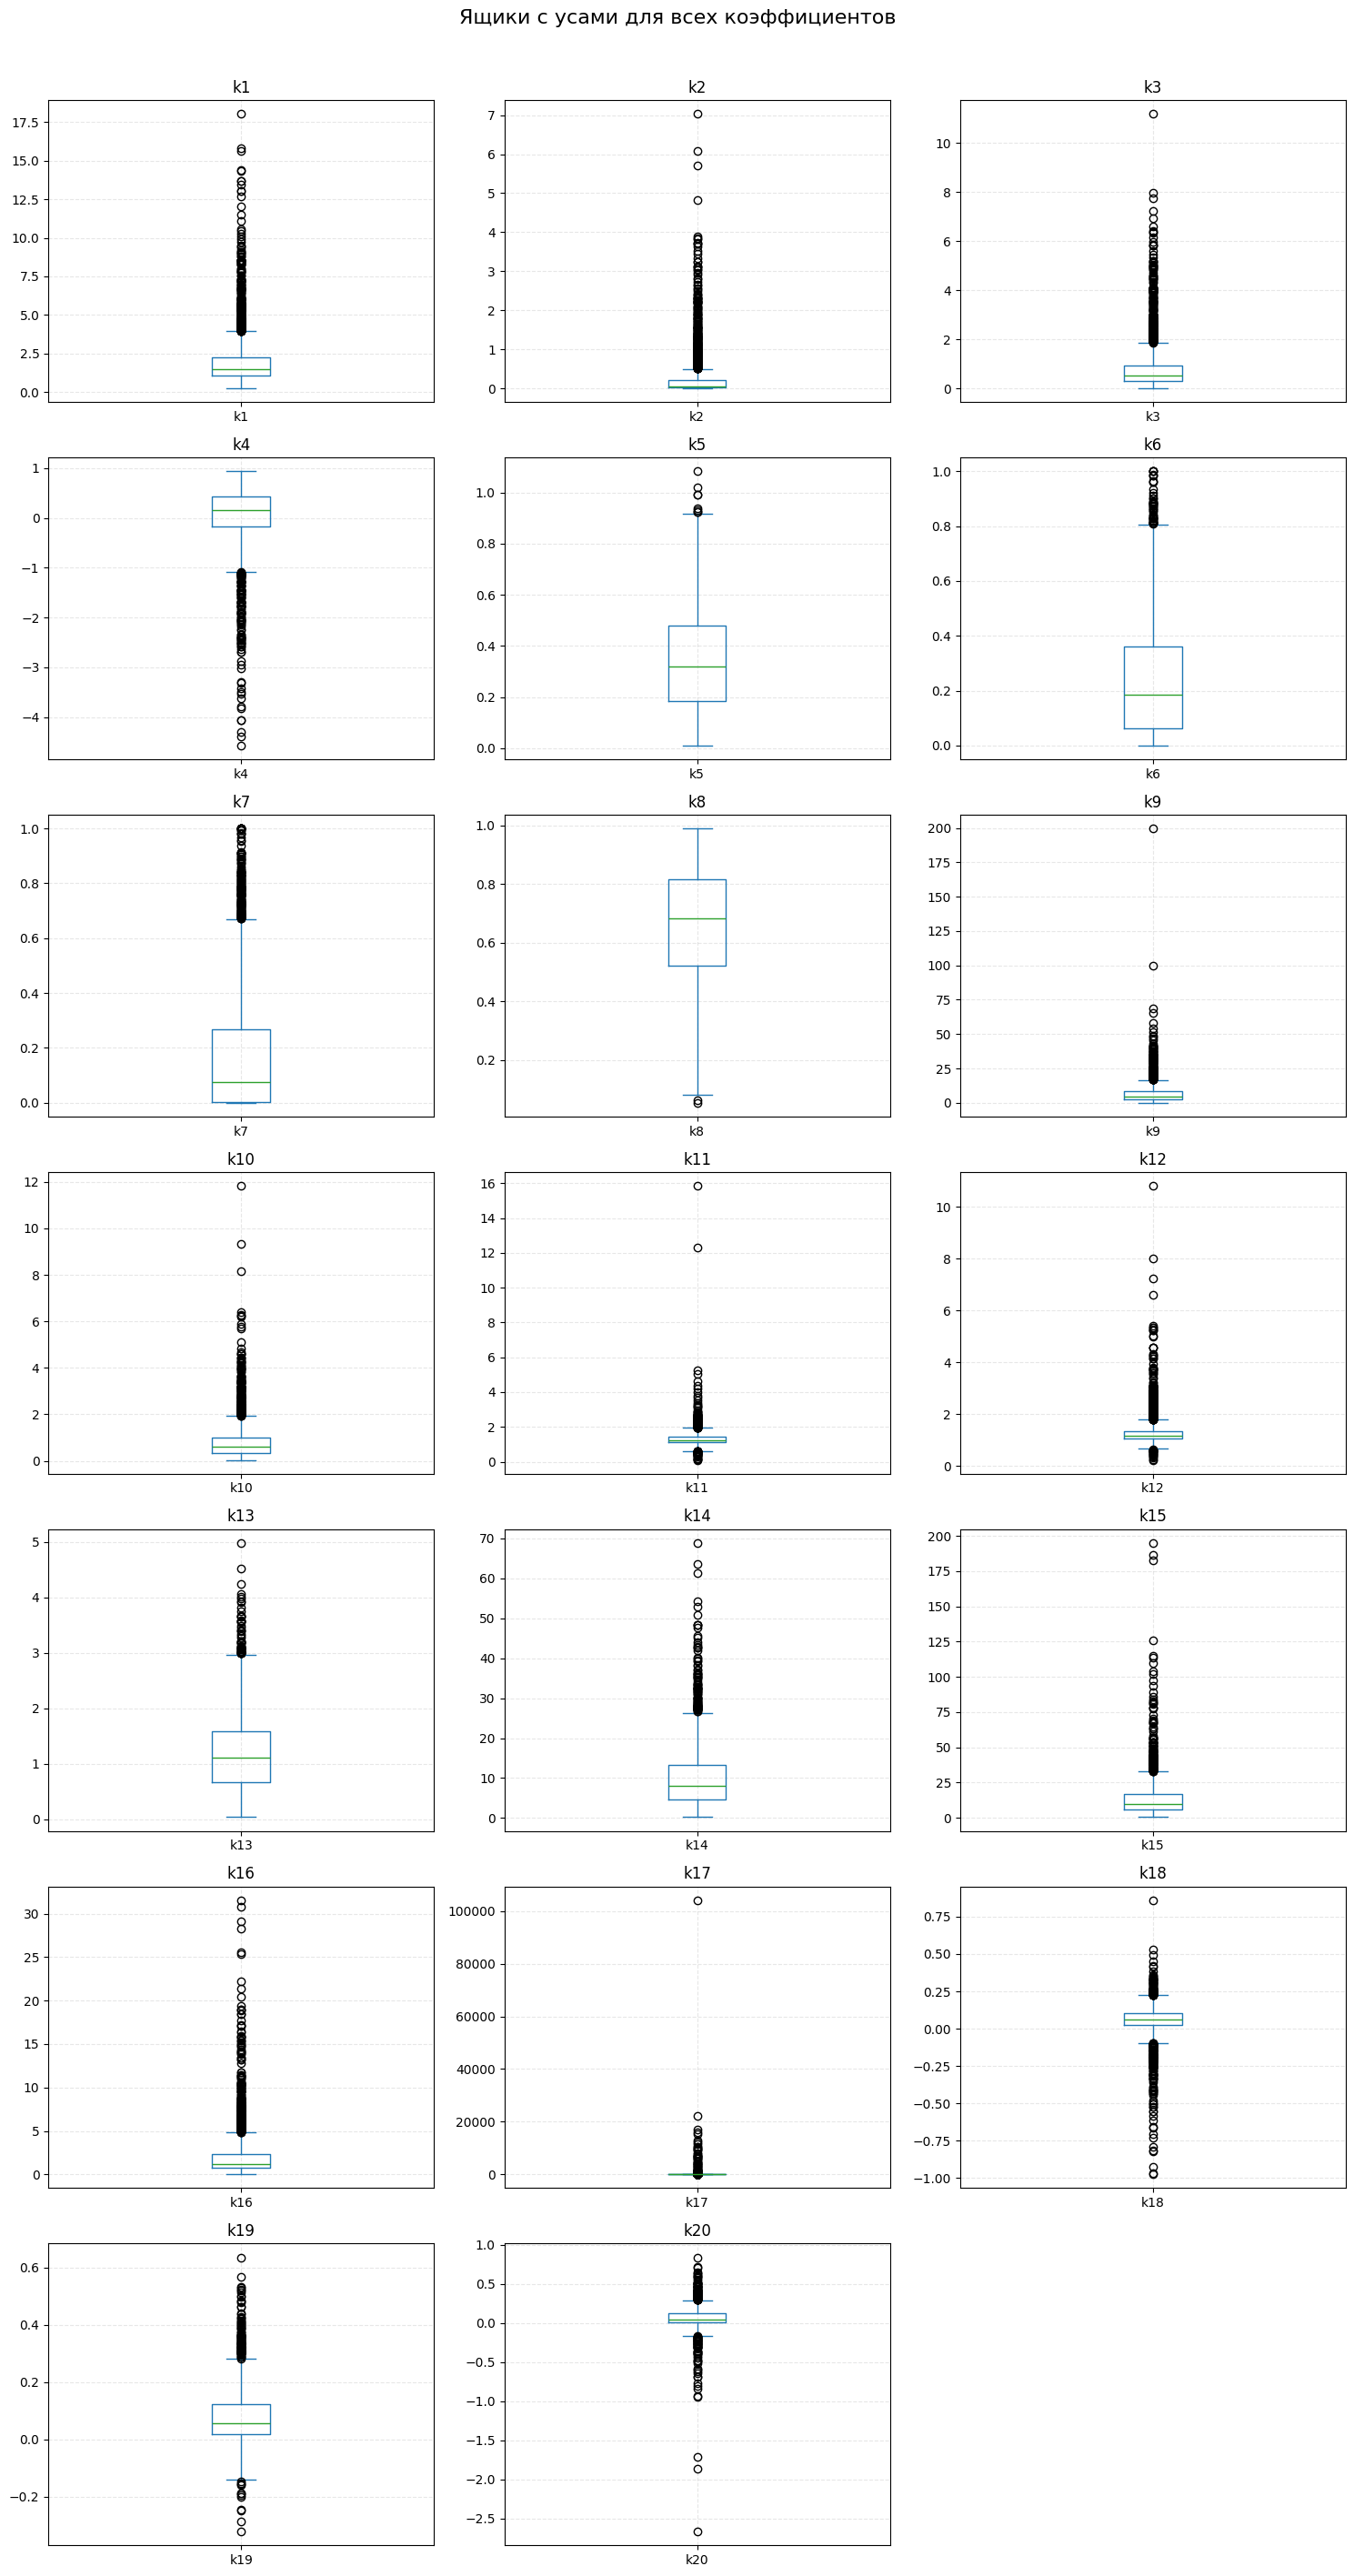

In [7]:
box_plot(coefficients_df)

In [8]:
boundaries_df = pd.DataFrame({
    'k1': [1.0, 5.0, 'direct'],
    'k2': [0.05, 0.8, 'direct'],
    'k3': [0.0, 2.0, 'direct'],
    'k4': [0.15, 1.0, 'direct'],
    'k5': [0.0, 1.0, 'inverse'],
    'k6': [0.0, 0.3, 'inverse'],
    'k7': [0.0, 0.3, 'inverse'],
    'k8': [0.0, 1.0, 'direct'],
    'k9': [0.8, 5.0, 'direct'],
    'k10': [0.3, 2.0, 'direct'],
    'k11': [1.0, 10.0, 'direct'],
    'k12': [0.5, 2.0, 'direct'],
    'k13': [0.5, 3.0, 'direct'],
    'k14': [1.0, 10.0, 'direct'],
    'k15': [0.0, 5.0, 'direct'],
    'k16': [0.0, 5.0, 'inverse'],
    'k17': [0.0, 100.0, 'direct'],
    'k18': [0.0, 30.0, 'direct'],
    'k19': [0.0, 20.0, 'direct'],
    'k20': [-0.5, 0.5, 'direct']
}, index=['Kmin', 'Kmax', 'Dir'])


coefficients_normalized = coefficients_df.copy()

for column in coefficients_df.columns:
    Kmin = boundaries_df.loc['Kmin', column]
    Kmax = boundaries_df.loc['Kmax', column]
    direction = boundaries_df.loc['Dir', column]

    coefficients_normalized[column] = process_koeff(
        df=coefficients_df,
        column=column,
        Kmin=Kmin,
        Kmax=Kmax,
        direction=direction
    )

coefficients_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
k1,2695.0,0.215527,0.247909,0.000000,0.024498,0.118465,0.309558,0.809119
k2,2695.0,0.121228,0.172328,0.000000,0.000000,0.007402,0.215383,0.453227
k3,2695.0,0.359089,0.272809,0.004165,0.158837,0.269174,0.470686,0.985853
k4,2695.0,0.179386,0.247711,0.000000,0.000000,0.000000,0.320234,0.924629
k5,2695.0,0.659648,0.184971,0.316988,0.520259,0.680092,0.814835,0.990056
k6,2695.0,0.418598,0.381519,0.000000,0.000000,0.382716,0.790227,1.000000
k7,2695.0,0.592089,0.407399,0.000000,0.104089,0.747748,0.996424,1.000000
k8,2695.0,0.661508,0.183890,0.319948,0.522272,0.681890,0.817227,0.990056
k9,2695.0,0.718870,0.340092,0.000000,0.426220,0.942610,1.000000,1.000000
k10,2695.0,0.273094,0.281214,0.000000,0.033106,0.186876,0.404346,0.897216


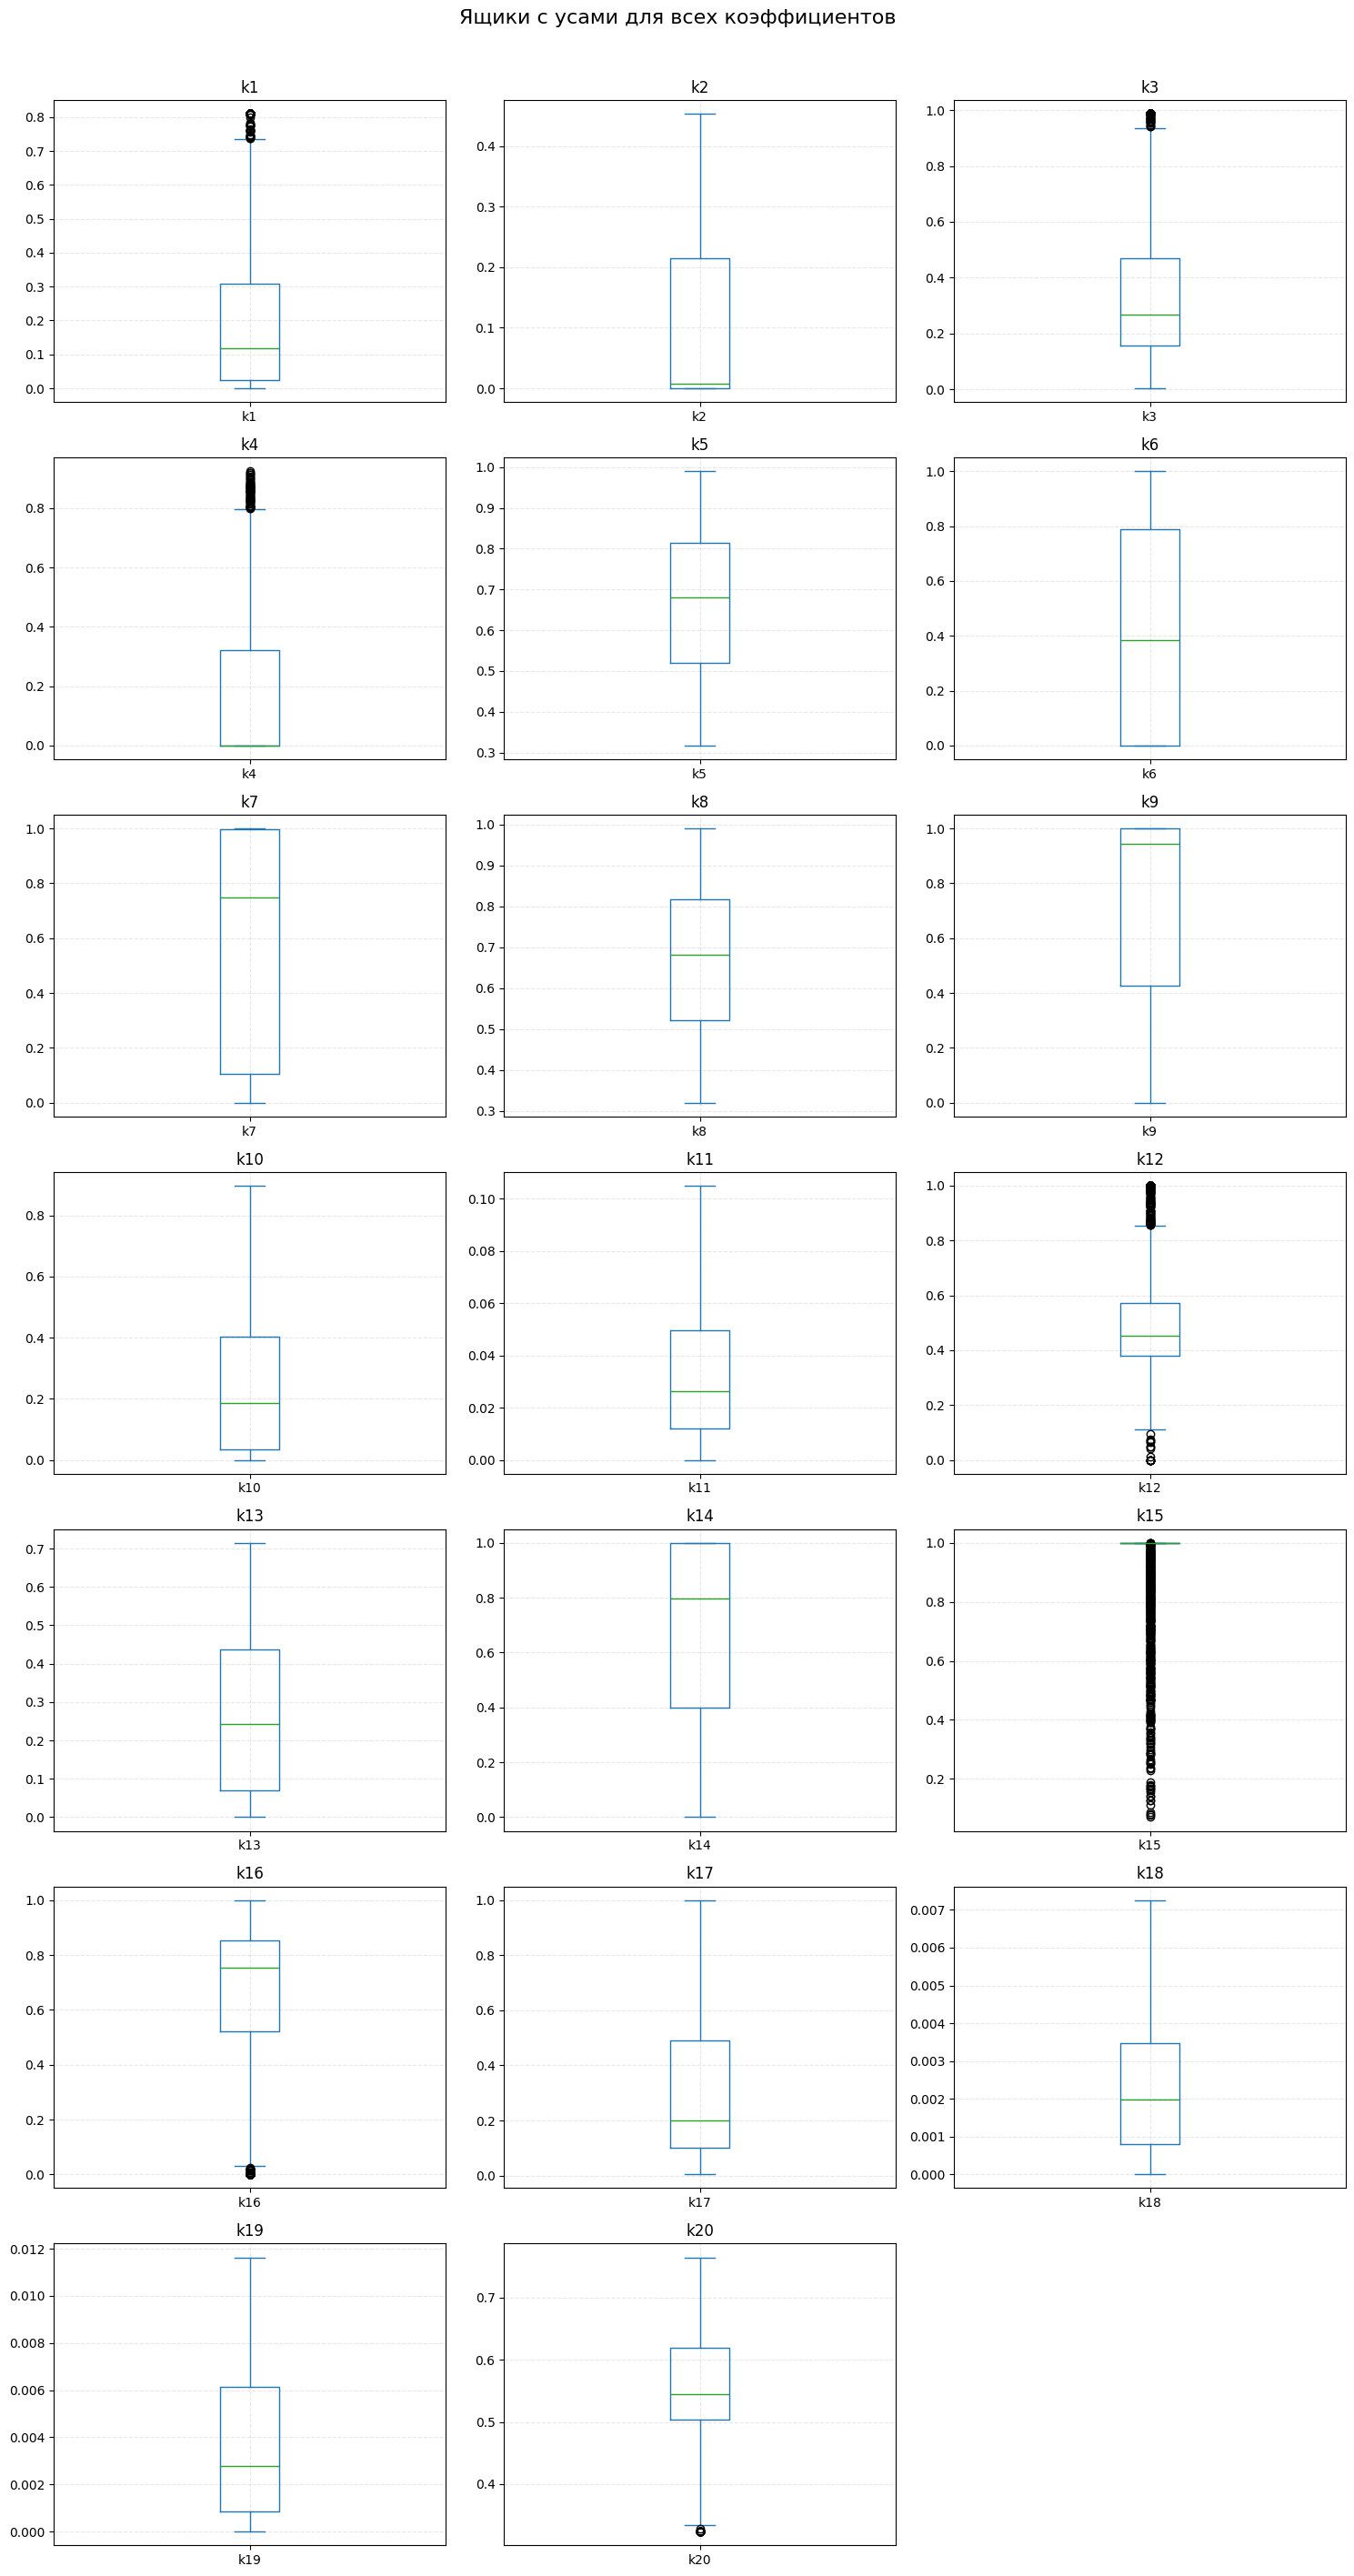

In [9]:
box_plot(coefficients_normalized)

__После обработки выбросов значения коэффициентовприводятся к единому масштабу от 0 до 1.__

# Корреляционный анализ

__Важным этапом статистического анализа данных является исследование корреляционных зависимостей между переменными, позволяющее выявить существующие взаимосвязи между переменными, их характер и тесноту.__

__Данный анализ целесообразно проводить после исключения аномальных наблюдений, так как их присутствие может искажать реально существующие зависимости.__

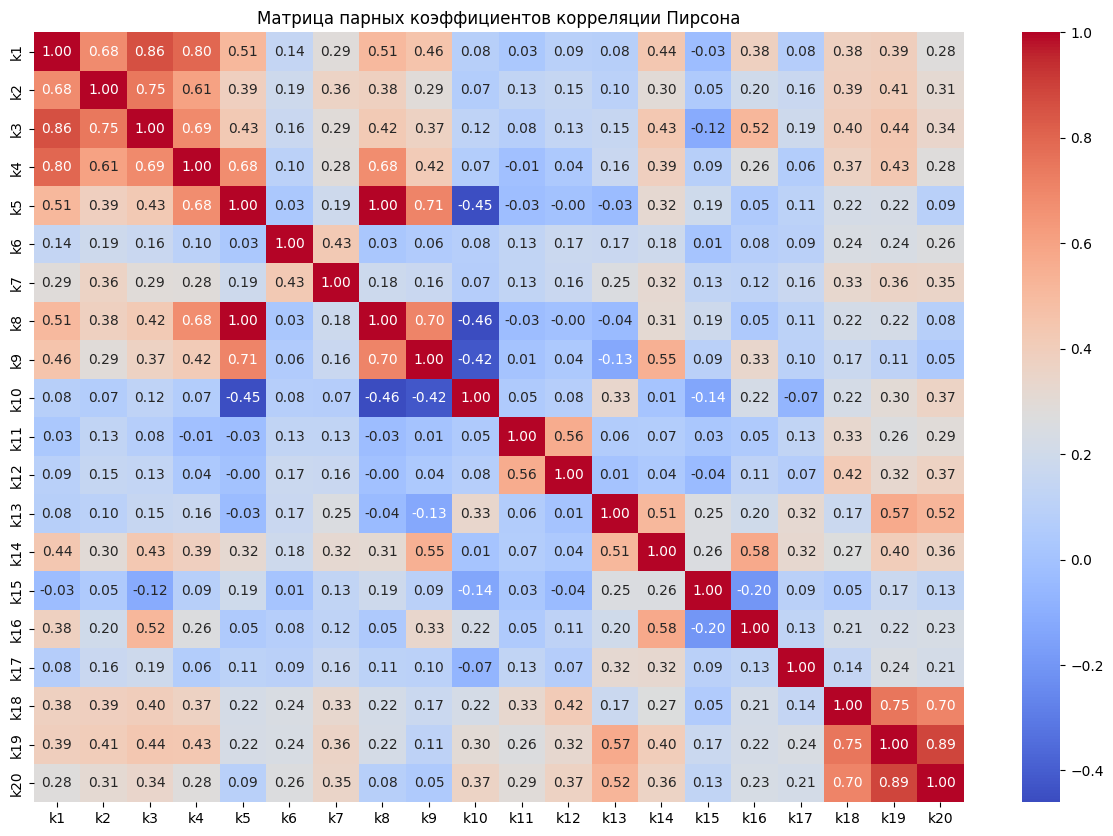

In [16]:
corr_matrix = coefficients_normalized.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица парных коэффициентов корреляции Пирсона')
plt.show()

In [11]:
strong_correlation = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        
        if abs(corr_matrix.iloc[i, j]) >= 0.7:
            strong_correlation.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

for elem in strong_correlation:
    print(f'{elem[0]}, {elem[1]}: {elem[2]}')

k1, k3: 0.8605489452919419
k1, k4: 0.7968711113227571
k2, k3: 0.7480526044529187
k5, k8: 0.997140640221804
k5, k9: 0.7054782041843135
k8, k9: 0.7042925888149503
k18, k19: 0.7530455681271448
k18, k20: 0.7044646135297636
k19, k20: 0.8883875945233481


__В результате анализа были выявлены пары коэффициентов с высокой степенью корреляционной зависимости (|r| ≥ 0.7).__

__На основании полученных результатов часть показателей была исключена из дальнейшего анализа.__

**При выборе коэффициентов учитывались следующие условия:**
1) **корреляционные связи (из дальнейшего анализа исключались коэффициенты, имеющие наиболее сильные корреляции с другими переменными);**
2) **распределение факторных нагрузок для полученных результатов факторного анализа (не учитывались переменные, имеющие слабую связь со всеми главными факторами);**
3) **степень важности каждого коэффициента, присвоенная экспертом;**
4) **точность вычисления (наличие большого разброса, а также числа аномальных значений коэффициентов и другого являлось основанием для исключения).**

In [12]:
selected_coefficients_df = coefficients_normalized.drop(['k3', 'k8', 'k12', 'k16', 'k17', 'k20'], axis=1)
selected_coefficients_df.to_csv('../data/data_censored.csv', index=False)